In [14]:
import numpy as np
from scipy.interpolate import interp1d
import corner
from myml import mymetropolis, mymh
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def lnp(x):
    if -10 < x < 10:
        return 0
    else:
        return -np.inf


def lnl(x, m, s):
    return -0.5*(((x - m)/s)**2)


#sampler = mymetropolis(1, 10, lnp, lnl)
sampler = mymh(1, 10, lnp, lnl, largs=[3, 2])
sampler.set_initial(np.random.rand(10, 1))
sampler.set_q(c=np.array([1]))
s, c = sampler.step(1000)
sampler.set_q(c=np.cov(s.T))
s, c = sampler.step(10000)

Run complete, acceptance fraction = 0.8437
Run complete, acceptance fraction = 0.70559


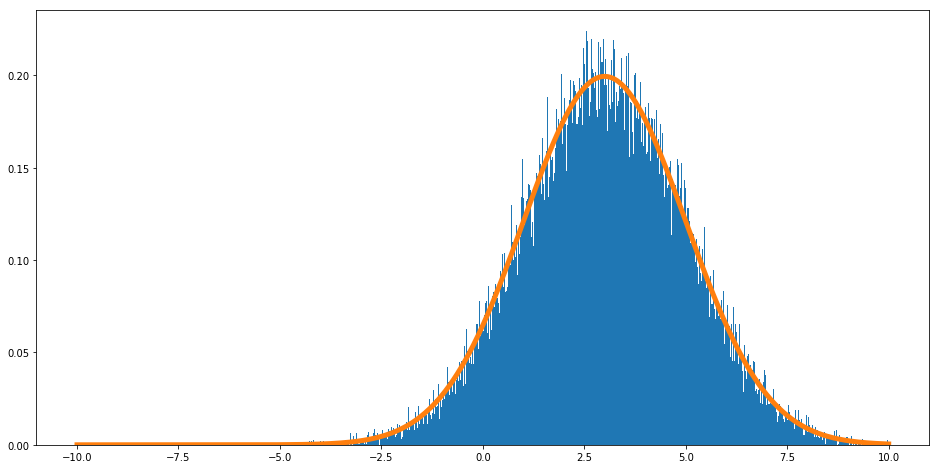

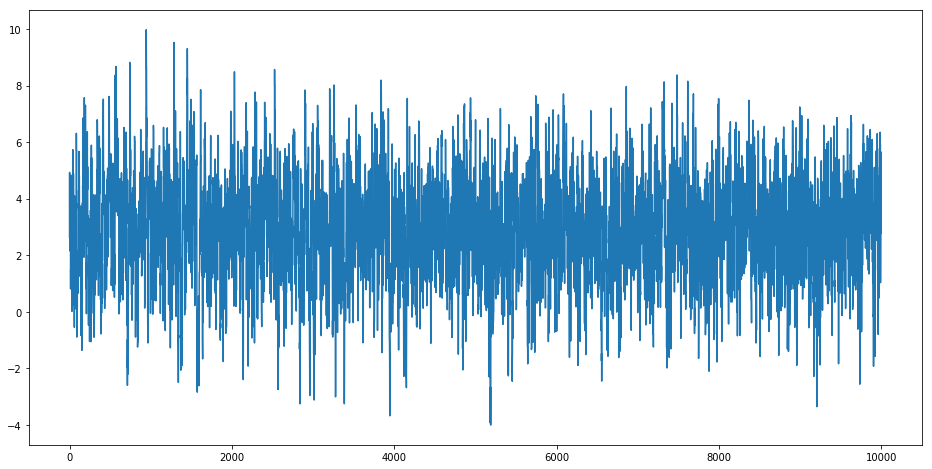

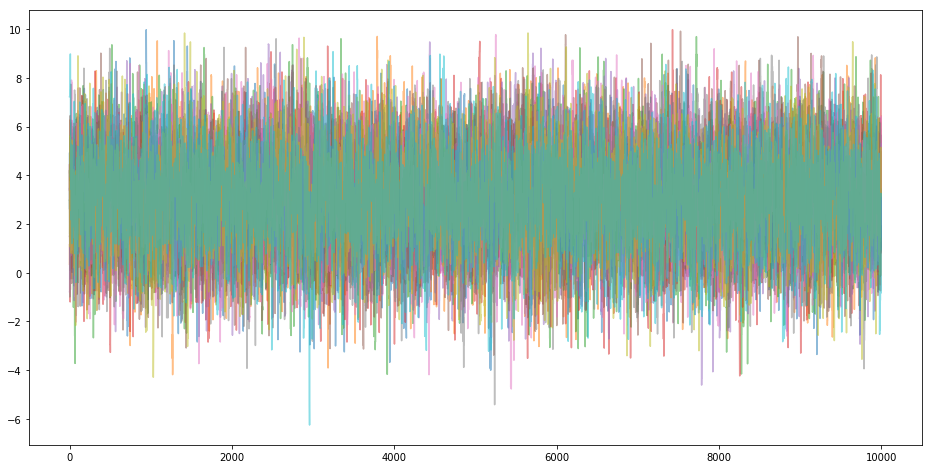

In [16]:
plt.figure(figsize=[16, 8])
_, _, _ = plt.hist(s, bins=1000, density=True)
x = np.linspace(-10, 10, num=1000)
y = (np.exp(lnl(np.linspace(-10, 10, num=1000), 3, 2))/
     np.sum(np.exp(lnl(np.linspace(-10, 10, num=1000), 3, 2)))/
     (x[1]-x[0]))
plt.plot(x, y, linewidth=5)
plt.figure(figsize=[16, 8])
plt.plot(c[:, 0, 0])
plt.figure(figsize=[16, 8])
for i in range(c.shape[1]):
    plt.plot(c[:, i, 0], alpha=0.5)

In [17]:
def q(x):
    if -1 < x < 0:
        return (1 + x)*2
    elif 0 <= x < 1:
        return 1 - x
    else:
        return 0


samplerq = mymh(1, 10, lnp, lnl, largs=[3, 2])
samplerq.set_initial(np.random.rand(10, 1))
samplerq.set_q(q=q, c=np.array([1]))
sq, cq = samplerq.step(1000)
sampler.set_q(c=np.cov(s.T))
sq, cq = samplerq.step(10000)

Run complete, acceptance fraction = 0.6565
Run complete, acceptance fraction = 0.66234


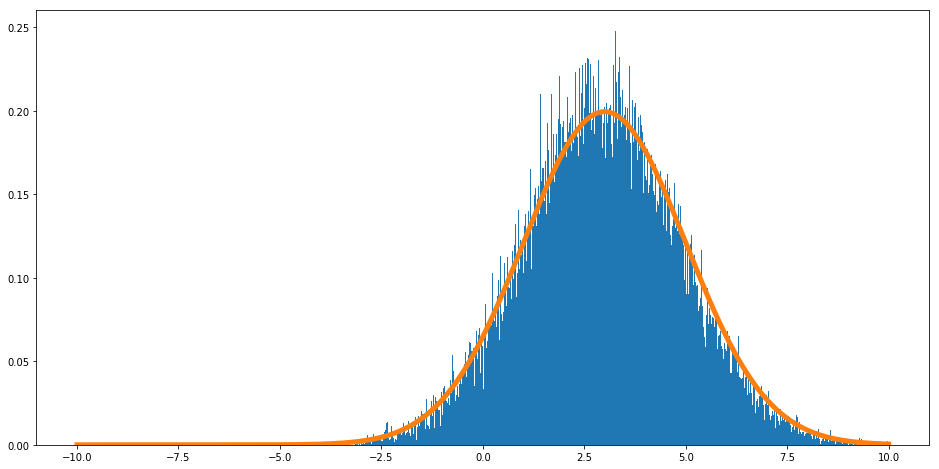

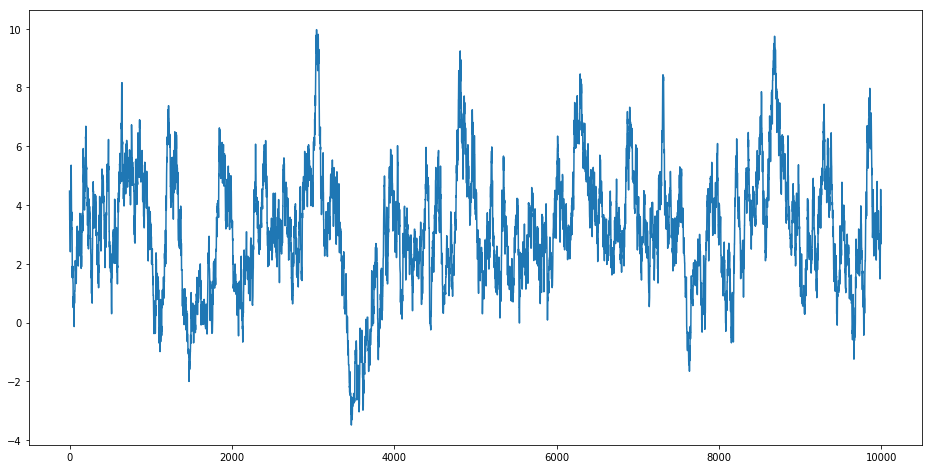

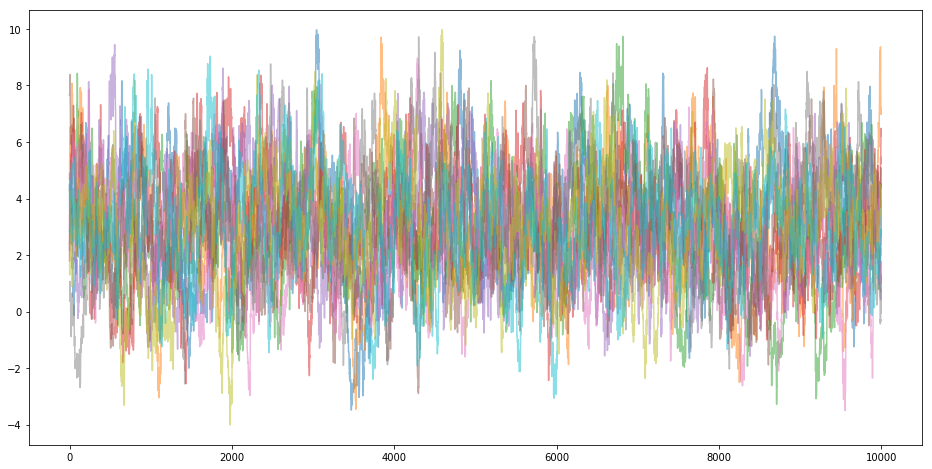

In [18]:
plt.figure(figsize=[16, 8])
_, _, _ = plt.hist(sq, bins=1000, density=True)
plt.plot(x, y, linewidth=5)
plt.figure(figsize=[16, 8])
plt.plot(cq[:, 0, 0])
plt.figure(figsize=[16, 8])
for i in range(cq.shape[1]):
    plt.plot(cq[:, i, 0], alpha=0.5)

In [19]:
class lnmn:
    
    def __init__(self, m, c):
        self.dim = np.size(m)
        self.m = m
        self.c = c
        if self.dim == 1:
            self.ic = 1/c
            self.dc = c
        else:
            self.ic = np.linalg.inv(c)
            self.dc = np.linalg.det(c)
    
    def __call__(self, x):
        return -0.5*(x-self.m).T@self.ic@(x-self.m) - 0.5*np.log(((2*np.pi)**self.dim)*self.dc)


lng = lnmn(np.array([0, 0, 0]), np.array([[4, 1, 0], [1, 1, 0], [0, 0, 0.2]]))


def lnl2(x):
    return lng(x)


def lnp2(x):
    if -10 < np.all(x) < 10:
        return 0
    else:
        return -np.inf

initial = np.zeros((10, 3))
initial[0, :] += 3
initial[1, :] += -3
initial[2, :] += 2
sampler2 = mymh(3, 10, lnp2, lnl2)
sampler2.set_initial(initial)
sampler2.set_q(c=np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]))
s2, c2 = sampler2.step(1000)
sampler.set_q(c=np.cov(s.T))
s2, c2 = sampler2.step(10000)

Run complete, acceptance fraction = 0.3285
Run complete, acceptance fraction = 0.33093


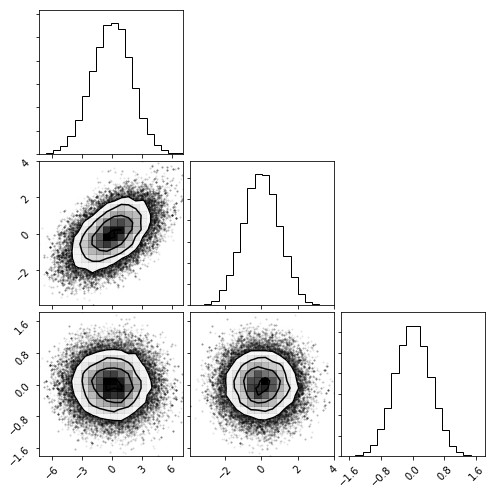

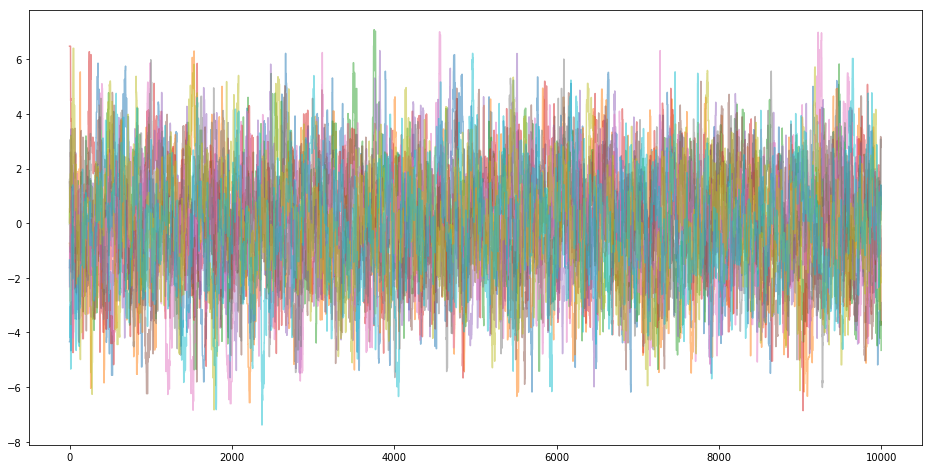

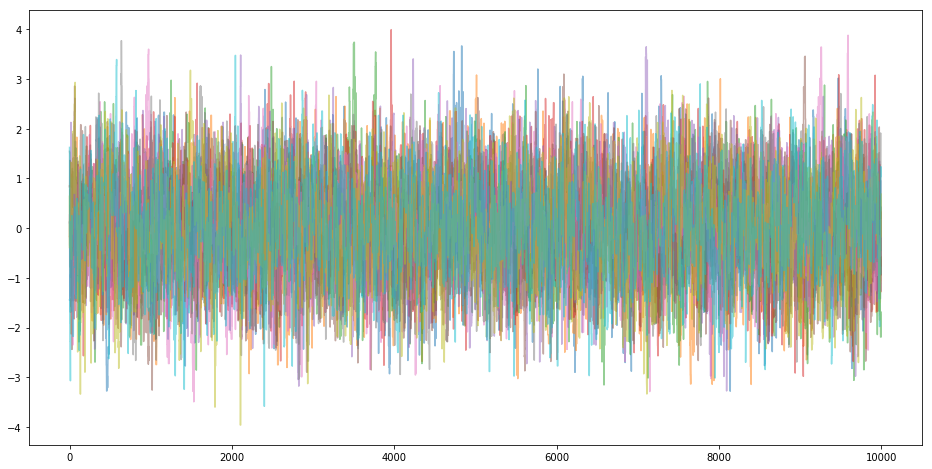

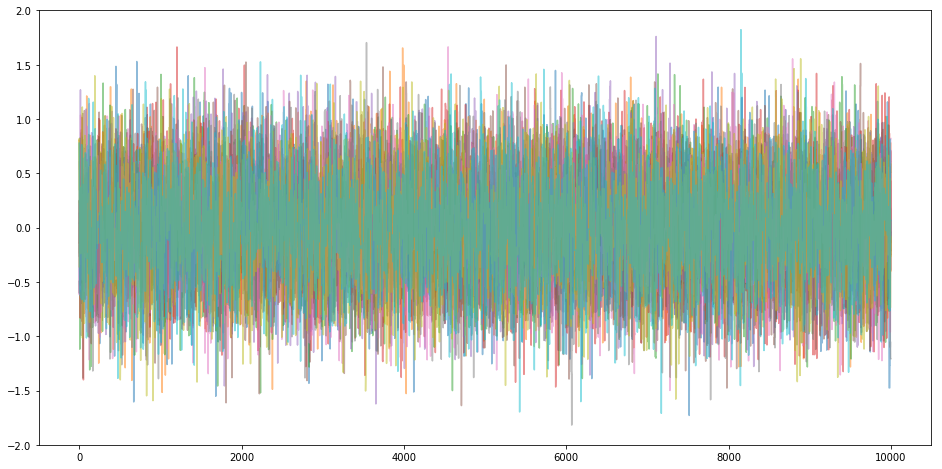

In [20]:
corner.corner(s2)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c2[:, i, 0], alpha=0.5)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c2[:, i, 1], alpha=0.5)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c2[:, i, 2], alpha=0.5)

In [21]:
initial = np.zeros((10, 3))
initial[0, :] += 3
initial[1, :] += -3
initial[2, :] += 2
sampler2q = mymh(3, 10, lnp2, lnl2)
sampler2q.set_initial(initial)
sampler2q.set_q(q=q, c=np.array([[2, 0, 0], [0, 1, 0], [0, 0, 1]]))
s2q, c2q = sampler2q.step(1000)
sampler.set_q(c=np.cov(s.T))
s2q, c2q = sampler2q.step(10000)

Run complete, acceptance fraction = 0.3225
Run complete, acceptance fraction = 0.31974


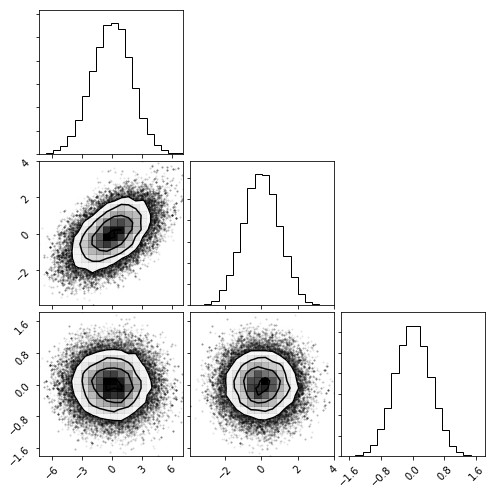

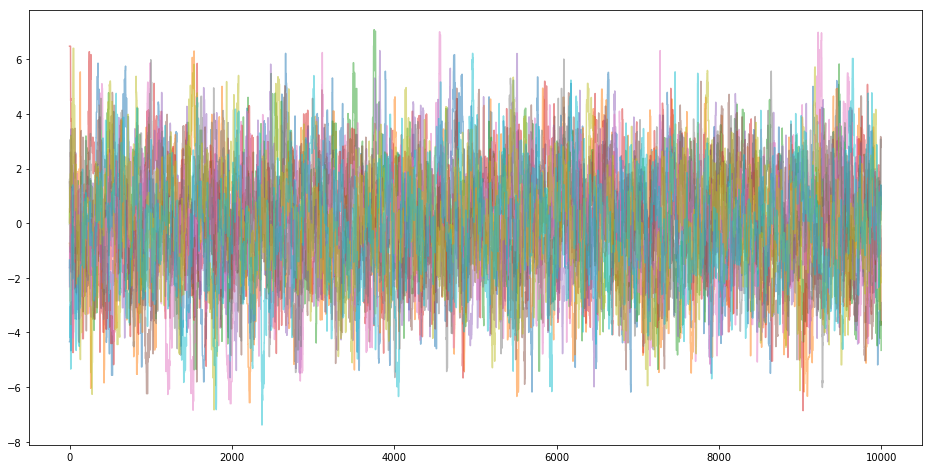

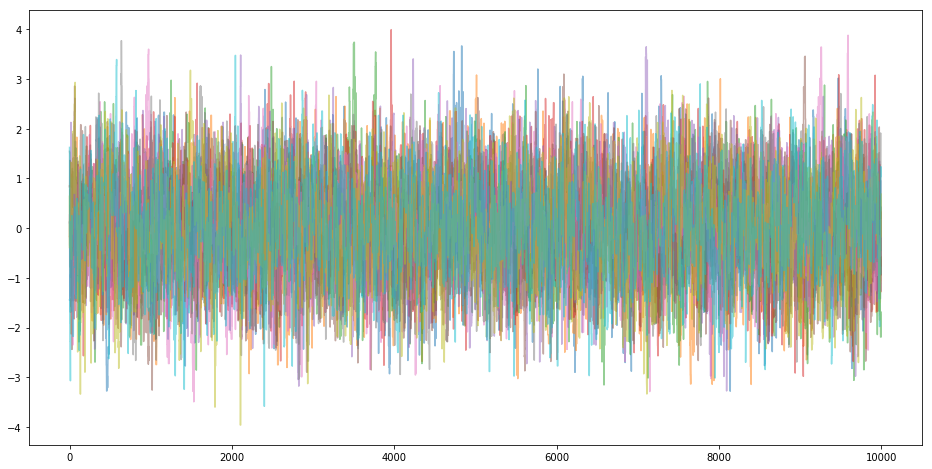

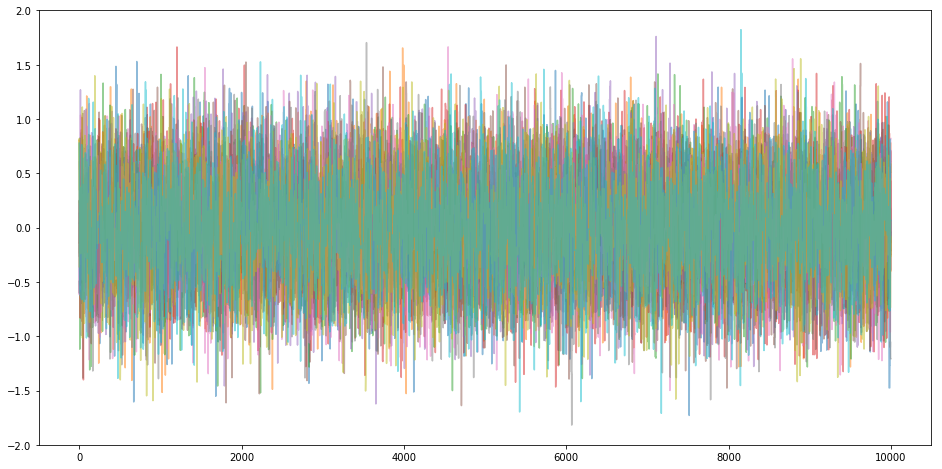

In [22]:
corner.corner(s2)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c2[:, i, 0], alpha=0.5)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c2[:, i, 1], alpha=0.5)
plt.figure(figsize=[16, 8])
for i in range(10):
    plt.plot(c2[:, i, 2], alpha=0.5)